In [1]:
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
feature_columns = [ 'Volume of aeration tanks (m3)', 'Actual Inf rate (m3/d)', '℃ Temp.Max.SamplingDate', '℃ Temp.Avg.SamplingDate', '℃ Temp.Min.SamplingDate', '℃ Dew.Max.SamplingDate',
 '℃ Dew.Avg.SamplingDate', '℃ Dew.Min.SamplingDate', '℃ Humidity.Max.SamplingDate', '℃ Humidity.Min.SamplingDate', '℃ Wind.Max.SamplingDate', '℃ Wind.Min.SamplingDate',
 '℃ Pressure.Max.SamplingDate', '℃ Pressure.Min.SamplingDate', '℃ Precipitation.SamplingDate', '℃ Temp.Max.WeekMean', '℃ Temp.Avg.WeekMean', '℃ Temp.Min.WeekMean',
 '℃ Dew.Max.WeekMean', '℃ Dew.Avg.WeekMean', '℃ Dew.Min.WeekMean', '℃ Humidity.Max.WeekMean', '℃ Humidity.Min.WeekMean', '℃ Wind.Max.WeekMean', '℃ Wind.Min.WeekMean',
 '℃ Pressure.Max.WeekMean', '℃ Pressure.Min.WeekMean', '℃ Precipitation.WeekMean', '℃ Temp.Max.WeekMax', '℃ Temp.Avg.WeekMax', '℃ Temp.Min.WeekMax', '℃ Dew.Max.WeekMax',
 '℃ Dew.Avg.WeekMax', '℃ Dew.Min.WeekMax', '℃ Humidity.Max.WeekMax', '℃ Humidity.Min.WeekMax', '℃ Wind.Max.WeekMax', '℃ Wind.Min.WeekMax', '℃ Pressure.Max.WeekMax',
 '℃ Pressure.Min.WeekMax', '℃ Precipitation.WeekMax', '℃ Precipitation.WeekAccum', '℃ Precipitation.MonthAccum', '℃ Ambient temperature (℃)', 
 'SRT (days)', 'Precip (inch)', 'Recycle ratio (total return sludge flow/total influent flow)', 
   'Position_enc', 'Country_enc', 'City_enc', 'Plant_enc', 'Year', 'Month', 'Day', 'Weekday', ]

target_column = [ 'COD (mg/l) In', 'BOD7 (mg/l) In', 'NH3 (mg/L) In', 'Total Nitrogen (mg/L) In', 
 'Total Phosphorus (mg/L) In', 'pH AS', 'DO (mg/L) AS', 'Temp (oC) AS', 'MLSS (mg/l) AS', 'MLVSS (mg/l) AS', 'SVI (ml/g) AS',]

In [3]:
original_df = pd.read_csv("../0. Data/modelling_data_250326.csv")
original_df = original_df.fillna(original_df.mean())
original_df = original_df.drop(columns=["Recycle ratio (total return sludge flow/total influent flow).1"])

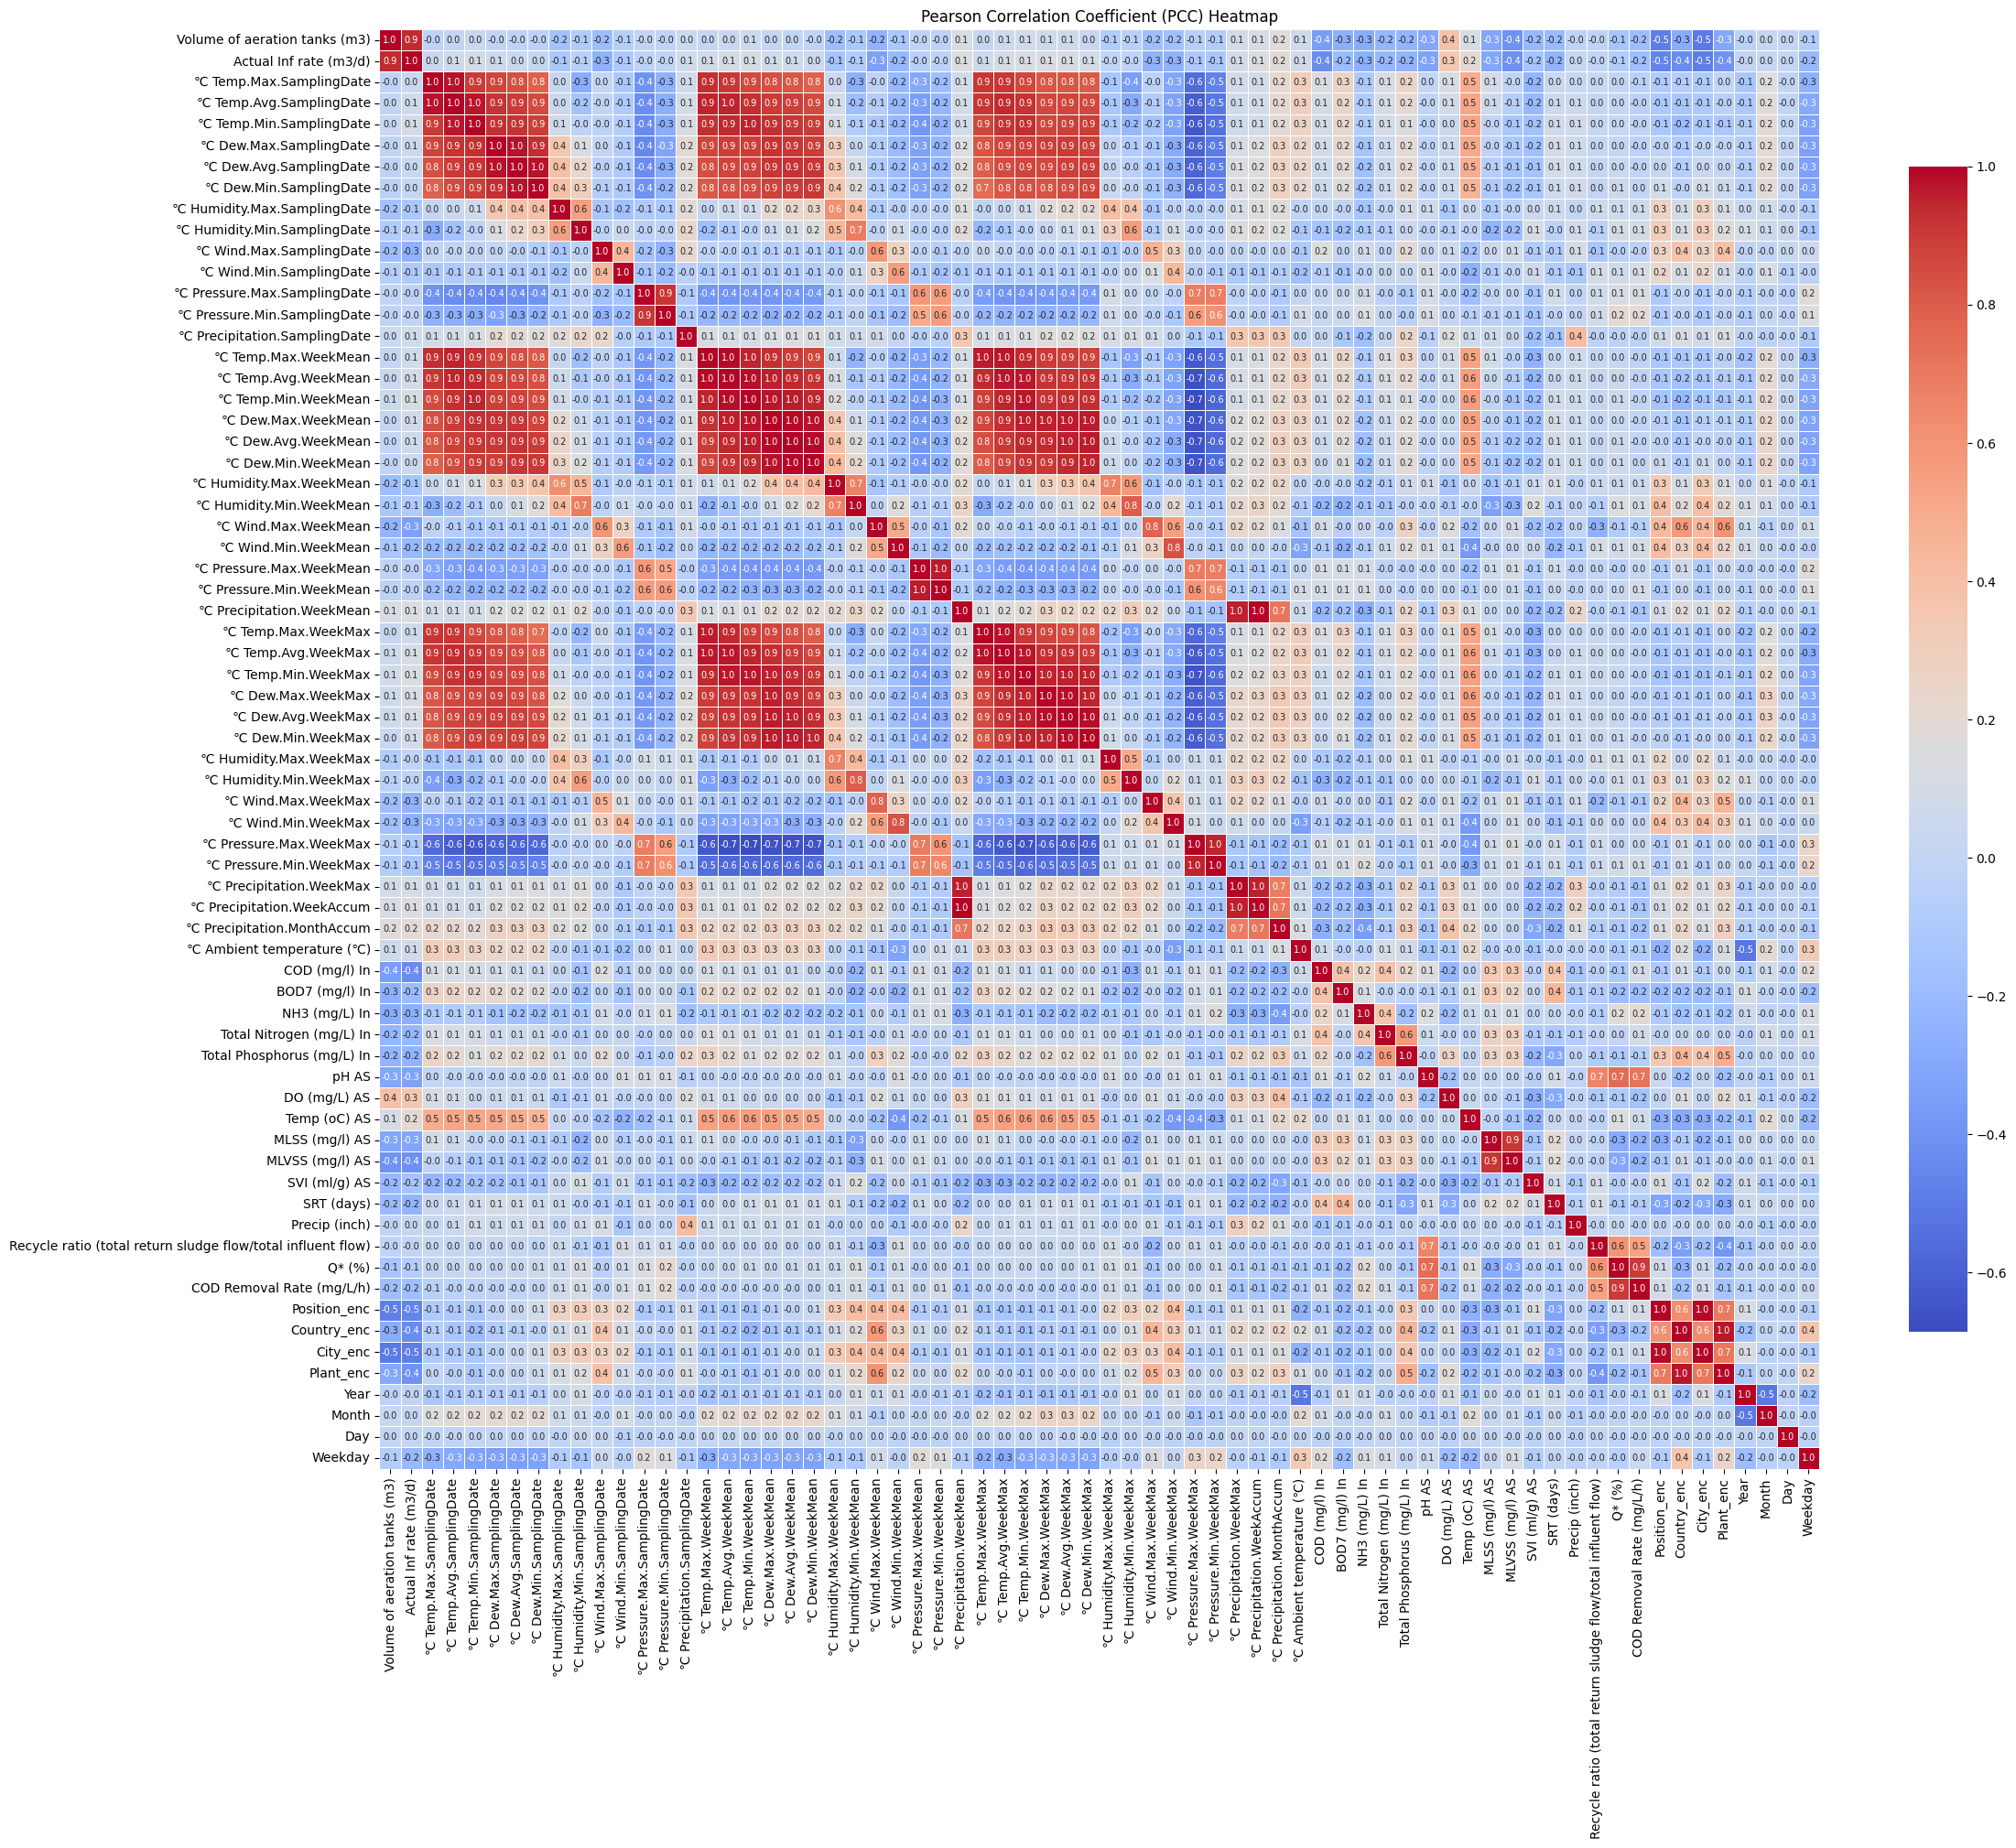

In [4]:
# 🔹 상관계수 행렬 계산 (PCC)
corr_matrix = original_df.corr(method='pearson')

# 🔹 히트맵 시각화
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5, annot_kws={"size": 7})
plt.title("Pearson Correlation Coefficient (PCC) Heatmap")
plt.tight_layout()
plt.show()

In [5]:
X = original_df[feature_columns]

y = original_df[target_column]

In [8]:
y_train

,COD (mg/l) In,BOD7 (mg/l) In,NH3 (mg/L) In,Total Nitrogen (mg/L) In,Total Phosphorus (mg/L) In,pH AS,DO (mg/L) AS,Temp (oC) AS,MLSS (mg/l) AS,MLVSS (mg/l) AS,SVI (ml/g) AS
803,864.350000,227.21037,50.780000,50.780000,5.030000,7.210000,0.080000,21.720000,4241.519231,3293.820529,143.178634
126,438.844077,240.00000,37.000000,50.000000,5.200000,7.300000,0.290000,17.800000,2900.000000,3293.820529,166.000000
513,108.000000,227.21037,0.174486,2.264706,2.498574,6.450000,6.700000,29.900000,2243.000000,1086.000000,143.178634
829,438.844077,227.21037,29.677411,43.586441,22.798358,7.078222,3.814061,19.639604,4241.519231,3293.820529,143.178634
840,438.844077,227.21037,29.677411,43.586441,22.798358,7.078222,3.814061,19.639604,4241.519231,3293.820529,143.178634
...,...,...,...,...,...,...,...,...,...,...,...
14,169.000000,227.21037,25.000000,34.500000,6.860000,5.710000,1.870000,12.700000,2690.000000,1930.000000,204.000000
199,369.000000,227.21037,79.000000,43.586441,22.798358,6.640000,6.730000,21.916667,2175.000000,1825.000000,120.000000
31,326.000000,227.21037,36.800000,31.300000,4.050000,6.710000,1.970000,16.900000,3310.000000,2390.000000,199.000000
523,98.000000,227.21037,8.340381,4.272549,1.924686,6.370000,7.400000,29.200000,2079.000000,1300.000000,143.178634


In [6]:
# 🔹 3. Split the data into training and test sets (70:30 split with random seed 1004)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1004)

# 🔹 4. Normalize feature values using standard scaling (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("NaNs in X_train:", np.isnan(X_train_scaled).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in X_train:", np.isinf(X_train_scaled).sum())
print("Infs in y_train:", np.isinf(y_train).sum())

NaNs in X_train: 0
NaNs in y_train: COD (mg/l) In                 0
BOD7 (mg/l) In                0
NH3 (mg/L) In                 0
Total Nitrogen (mg/L) In      0
Total Phosphorus (mg/L) In    0
pH AS                         0
DO (mg/L) AS                  0
Temp (oC) AS                  0
MLSS (mg/l) AS                0
MLVSS (mg/l) AS               0
SVI (ml/g) AS                 0
dtype: int64
Infs in X_train: 0
Infs in y_train: COD (mg/l) In                 0
BOD7 (mg/l) In                0
NH3 (mg/L) In                 0
Total Nitrogen (mg/L) In      0
Total Phosphorus (mg/L) In    0
pH AS                         0
DO (mg/L) AS                  0
Temp (oC) AS                  0
MLSS (mg/l) AS                0
MLVSS (mg/l) AS               0
SVI (ml/g) AS                 0
dtype: int64


In [12]:
# 🔹 5. Build a 3-layer deep neural network (MLP) for regression
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(11)  # Output layer without activation for regression
])

# 🔹 6. Compile the model using Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 7. Train the model with validation on the test set
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=800,
                    batch_size=32,
                    verbose=1)



Epoch 1/800


/Users/k23070952/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3471093.5000 - mae: 776.8885 - val_loss: 3463358.7500 - val_mae: 775.8950
Epoch 2/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 3280081.0000 - mae: 749.1478 - val_loss: 3397876.0000 - val_mae: 760.5080
Epoch 3/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 3217863.2500 - mae: 734.8216 - val_loss: 3080140.2500 - val_mae: 710.8242
Epoch 4/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 2928744.2500 - mae: 692.2634 - val_loss: 2240504.2500 - val_mae: 602.9318
Epoch 5/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 1738509.2500 - mae: 531.2046 - val_loss: 1265731.3750 - val_mae: 437.8944
Epoch 6/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1073365.6250 - mae: 400.9441 - val_loss: 953458.5625 - val_mae: 361.8272
Epoch 7/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 816011.3125 - mae: 339.0238 - val_loss: 797578.1250 - val_mae: 325.6389
Epoch 8/800
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 762957.5000

In [13]:
# 🔹 8. Prediction
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


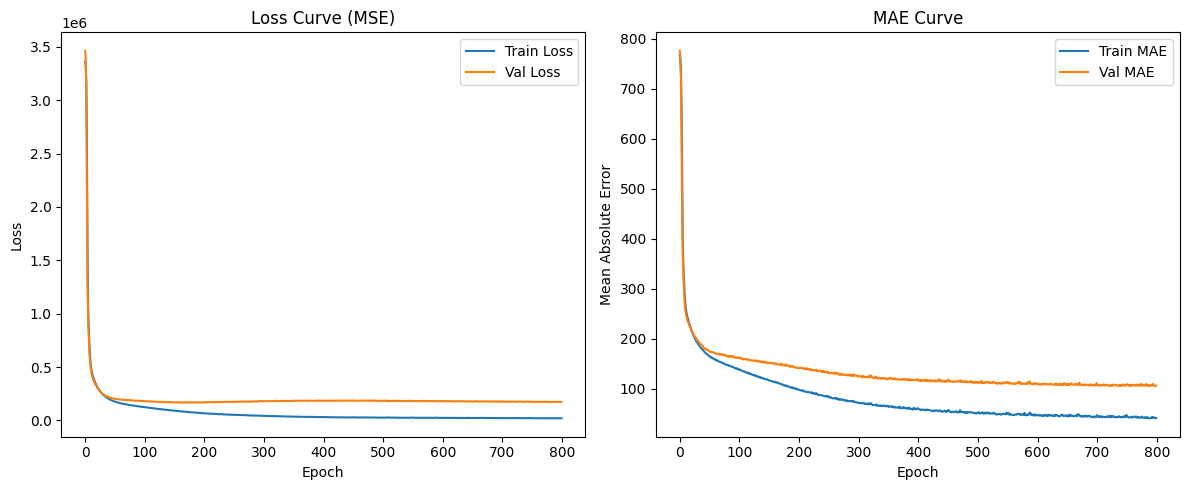

In [14]:
# 🔹 9. Plot training and validation loss/MAE over epochs
plt.figure(figsize=(12, 5))

# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()



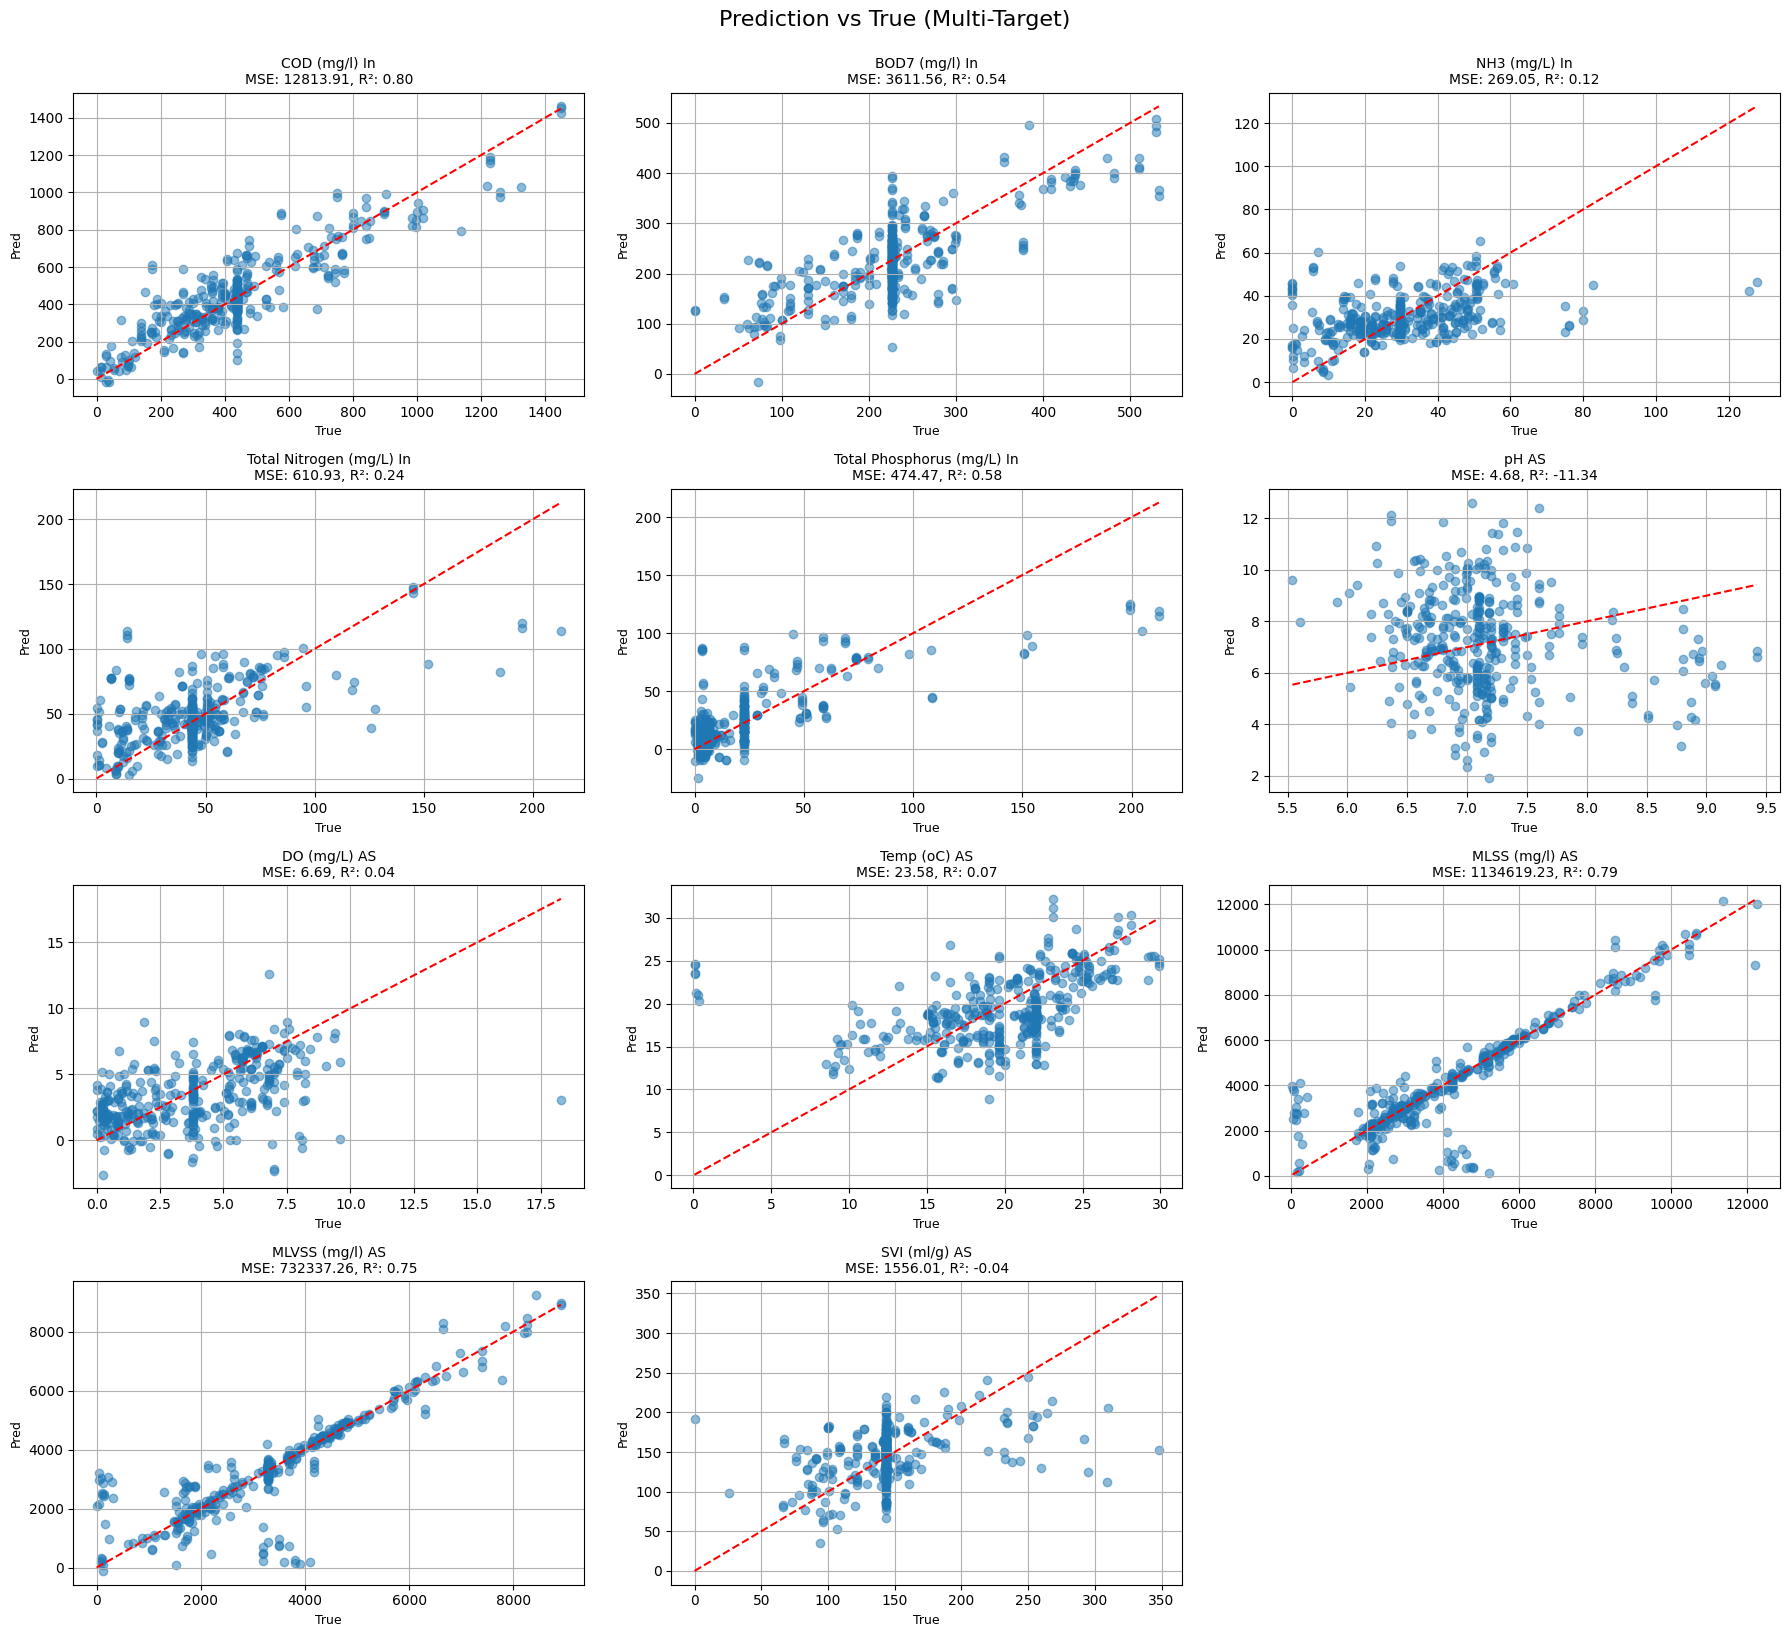

In [16]:
# 타겟 컬럼 리스트 (총 11개)
target_columns = [ 'COD (mg/l) In', 'BOD7 (mg/l) In', 'NH3 (mg/L) In', 'Total Nitrogen (mg/L) In', 
                   'Total Phosphorus (mg/L) In', 'pH AS', 'DO (mg/L) AS', 'Temp (oC) AS',
                   'MLSS (mg/l) AS', 'MLVSS (mg/l) AS', 'SVI (ml/g) AS' ]

# 예측값 DataFrame으로 변환
y_test_df = pd.DataFrame(y_test, columns=target_columns)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=target_columns)

# 4x3 서브플롯 생성
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

for i, col in enumerate(target_columns):
    ax = axes[i]
    ax.scatter(y_test_df[col], y_test_pred_df[col], alpha=0.5)
    ax.plot([y_test_df[col].min(), y_test_df[col].max()],
            [y_test_df[col].min(), y_test_df[col].max()],
            'r--')

    mse = mean_squared_error(y_test_df[col], y_test_pred_df[col])
    r2 = r2_score(y_test_df[col], y_test_pred_df[col])
    
    ax.set_title(f"{col}\nMSE: {mse:.2f}, R²: {r2:.2f}", fontsize=10)
    ax.set_xlabel("True", fontsize=9)
    ax.set_ylabel("Pred", fontsize=9)
    ax.grid(True)

# 빈 칸 비우기 (총 12개 중 마지막 1개는 비어 있음)
if len(target_columns) < len(axes):
    for j in range(len(target_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Prediction vs True (Multi-Target)", fontsize=16, y=1.02)
plt.show()